This notebook makes Figure 1(a) from Protheroe & Biermann (1996; https://arxiv.org/pdf/astro-ph/9605119.pdf). There are two stages to the notebook:

1. An annotated guide to the steps in the calculation;
2. Code to reproduce the figure exactly.

---

In [1]:
import numpy as np
import pylab as pl

from pacholcsyk import *
from freefree import *

In [2]:
pc2cm = 3.086e18  # constant for converting pc --> cm

To start with we can define a few parameters of the galaxy, following PB96: 

- We'll model it as a solid disk with height 1kpc and a radius of 15kpc. 

- We'll assume a galactic magnetic field strength of 6 $\mu$G.

- We'll assume a thermal electron density of 0.01 cm$^{-3}$

- We'll assume a thermal electron temperature of $3\times 10^5$ K.


In [3]:
gal_radius_kpc = 15.
gal_height_kpc = 1.
H_G = 6e-6				# [G] = 6 uGauss  [CGS units]
ne_cm = 0.01			# cm^-3	[CGS units]
Te = 3e5				# [K]
N0 = 1e-8				# what should this be..? [m^-3 MeV^-1]

We'll calculate the spectrum over a range of frequencies from 1 kHz to 10 GHz:

In [4]:
nu = 10**np.arange(3,10,0.1)  # 1 kHz -> 10 GHz

The emissivity [in CGS units] is given by:

$$
\epsilon_{\nu} = \frac{1}{2}c_3 B \sin \theta \int_0^{\infty}{ N(E) F(x) {\rm d}E }
$$

We're going to use the equations from Pacholcsyk. The code for these can be found in the accompanying module pacholcsyk.py.

In [5]:
em_nu = calc_em_synch(nu,H_G,N0)

integrals.py:15: RuntimeWarning: divide by zero encountered in log
  return quad(lambda x,*args: np.exp(x + np.log(func(np.exp(x),*args))), np.log(a), np.log(b), **kwargs)


The free-free absorption co-efficient in units of pc$^{-1}$ is given by:

$$
\kappa_{\nu} = 1.64\times 10^5~T_{\rm e}\,n_{\rm e}^2\,\nu^{-2.1}
$$

[REF] where temperature is in Kelvin, electron density is in cm$^{-3}$ and frequency is in MHz. 

In [6]:
kappa_nu = kappa_ff(nu,ne_cm,Te)  # pc^-1
kappa_nu/= pc2cm

The optical depth is calculated using

$$
\tau_{\nu} = \int_{l.o.s.}{\kappa_{\nu}\,{\rm d}\ell}
$$

The maximum path length will be for a viewing angle of 90 degrees, when the galaxy is edge-on. The minimum path length will be for a viewing angle of 0 degrees, when the galaxy is face-on.

In [7]:
dl_max = gal_radius_kpc*1000.*pc2cm  # edge-on
dl_min = gal_height_kpc*1000.*pc2cm  # face-on

dl = dl_max
tau_nu = kappa_nu*dl # dimensionless

We then implement the equation of radiative transfer for an absorbing/emitting region:

$$
I_{\nu} = S_{\nu}\left( 1 - {\rm e}^{-\tau_{\nu}} \right)
$$

where,

$$
S_{\nu} = \frac{\epsilon_{\nu}}{\kappa_{\nu}}
$$

In [8]:
em_nu = (em_nu/kappa_nu)*(1 - np.exp(-1.*tau_nu))

Figure 1(a) from Protheroe & Biermann is normalised to $I_{\rm 1.4\,GHz}$, so let's quickly repeat that at a single frequency:

In [9]:
nu_21cm = np.array([1.4e9])
em_21cm = calc_em_synch(nu_21cm,H_G,N0)
kappa_21cm = kappa_ff(nu_21cm,ne_cm,Te)  # pc^-1
kappa_21cm/= pc2cm
tau_21cm = kappa_21cm*dl # dimensionless
em_21cm=(em_21cm/kappa_21cm)*(1 - np.exp(-1.*tau_21cm))

Then do the normalisation and plot the result:

In [10]:
i_nu = em_nu/em_21cm

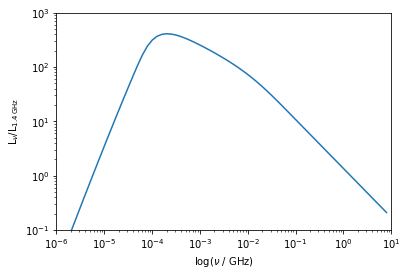

In [11]:
ax = pl.subplot(111)
pl.plot(nu/1e9,i_nu)
pl.axis([10**-6,10,0.1,10**3])
pl.xlabel(r"$\log(\nu$ / GHz)")
pl.ylabel(r"L$_{\nu}$/L$_{\rm 1.4\,GHz}$")
pl.loglog()
pl.show()

----

To make the exact plot from the Protheroe & Biermann paper:

In [12]:
nu = 10**np.arange(3,12,0.1)  # 1 kHz -> 10 GHz
em_nu = calc_em_synch(nu,H_G,N0)
kappa_nu = kappa_ff(nu,ne_cm,Te)  # pc^-1
kappa_nu/= pc2cm

In [13]:
nu_21cm = np.array([1.4e9])
em_21cm = calc_em_synch(nu_21cm,H_G,N0)
kappa_21cm = kappa_ff(nu_21cm,ne_cm,Te)  # pc^-1
kappa_21cm/= pc2cm

In [14]:
dl_max = gal_radius_kpc*1000.*pc2cm       # edge-on [90 degrees]
dl_min = gal_height_kpc*1000.*pc2cm       # face-on [0 degrees]
dl_iso = 1.61*gal_height_kpc*1000.*pc2cm  # isotropic viewing angle [<sin theta> = 0.785]

tau_nu_max = kappa_nu*dl_max 
tau_nu_min = kappa_nu*dl_min 
tau_nu_iso = kappa_nu*dl_iso

tau_21cm_max = kappa_21cm*dl_max
tau_21cm_min = kappa_21cm*dl_min
tau_21cm_iso = kappa_21cm*dl_iso

In [15]:
em_nu_max = (em_nu/kappa_nu)*(1 - np.exp(-1.*tau_nu_max))
em_nu_min = (em_nu/kappa_nu)*(1 - np.exp(-1.*tau_nu_min))
em_nu_iso = (em_nu/kappa_nu)*(1 - np.exp(-1.*tau_nu_iso))

In [16]:
em_21cm_max=(em_21cm/kappa_21cm)*(1 - np.exp(-1.*tau_21cm_max))
em_21cm_min=(em_21cm/kappa_21cm)*(1 - np.exp(-1.*tau_21cm_min))
em_21cm_iso=(em_21cm/kappa_21cm)*(1 - np.exp(-1.*tau_21cm_iso))

In [17]:
i_nu_max = em_nu_max/em_21cm_max
i_nu_min = em_nu_min/em_21cm_min
i_nu_iso = em_nu_iso/em_21cm_iso

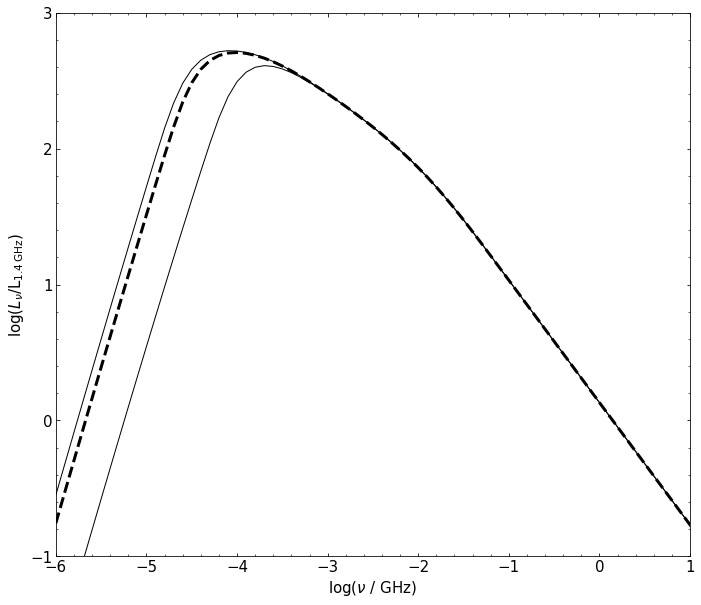

In [19]:
from matplotlib.ticker import AutoMinorLocator

ax = pl.subplot(111)

pl.plot(np.log10(nu/1e9),np.log10(i_nu_max),c='black',lw=1)
pl.plot(np.log10(nu/1e9),np.log10(i_nu_min),c='black',lw=1)
pl.plot(np.log10(nu/1e9),np.log10(i_nu_iso),c='black',lw=3,ls='--')

# make the axes the same as in the paper:
pl.axis([-6,1,-1,3])
pl.xlabel(r"$\log(\nu$ / GHz)",size=15)
pl.ylabel(r"$\log( L_{\nu}$/L$_{\rm 1.4\,GHz})$",size=15)
pl.locator_params(axis='x', nbins=8)
pl.locator_params(axis='y', nbins=5)
ax.tick_params(which="both",direction="in",top=True,right=True,labelsize=15)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_aspect(1.5)

pl.rcParams['figure.figsize'] = [80, 10]
pl.show()